# Mahi Gangal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/raw/amazon 2.csv')


## Research question/interests

1. **How discounts can affect the sales and ratings of different products?**

I would like to understand if there are any relations between discounts and customer ratigs and reviews for different products. Also, if the customer's ratings change when the price of the products change from the actual price to the discounted price.

2. **What are the most common keywords used in product descriptions on Amazon and do they have any impact on sales?**

This research question will be very iteresting to analyze as to how a few words in the product's description can change people's minds in buying something they actually do not need.

3. **Which category of products has the highest sale?**

Generally, people prefer to shop online for only a certian category of products and tend to go to shops themselves to buy something that they actually need to try before buying. 


In [ ]:
# first few rows of the dataset
df.head()

# shape of the dataset
df.shape

#  data types of each variable
df.dtypes

# Check for missing values
df.isnull().sum()

#Number of columns
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title'],
      dtype='object')

We can see from the above commands, that the dataset has 16 features or variables and 1465 entries. The dataset has only 2 null values under rating_count. 

In [ ]:
#drop all the null values from the dataset
df.dropna(axis=0,how="any",inplace=True) 

# Check if the null values have been removed
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

My EDA is mostly based on the features 'category', 'rating_count', and 'discount_percentage'.

In [ ]:
#Unique ratings

df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
#Finding the rating with '|'

df.loc[df.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,Home&Kitchen,2099.0,2499.0,16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
#Removing this particular row

df.drop(index=1279 , inplace= True)
df.info()

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,18307.376881
std,6950.548042,10884.467444,21.613905,42766.096572
min,39.000000,39.000000,0.000000,2.000000
25%,325.000000,800.000000,32.000000,1191.500000
50%,799.000000,1670.000000,50.000000,5179.000000
75%,1999.000000,4321.250000,63.000000,17342.250000
max,77990.000000,139900.000000,94.000000,426973.000000


In [ ]:
#Unique category

df.category.unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [ ]:
#grouping by the mean of each category

df.groupby(['category']).mean()


/var/folders/dg/5ykzc8ms5q99h8472h4rktth0000gn/T/ipykernel_7280/4234843485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['category']).mean()


,discounted_price,actual_price,discount_percentage,rating_count
category,,,,
Car&Motorbike,2339.000000,4000.000000,42.000000,1118.000000
Computers&Accessories,845.393836,1686.659157,53.920177,17136.782705
Electronics,5965.887833,10127.311787,50.828897,29997.809886
Health&PersonalCare,899.000000,1900.000000,53.000000,3663.000000
Home&Kitchen,2331.133803,4165.794183,40.174497,6689.210291
HomeImprovement,337.000000,799.000000,57.500000,4283.000000
MusicalInstruments,638.000000,1347.000000,46.000000,44441.000000
OfficeProducts,301.580645,397.193548,12.354839,4828.225806
Toys&Games,150.000000,150.000000,0.000000,15867.000000


In [ ]:
#Drop specific columns

df = df.drop(columns=['product_link', 'img_link', 'review_content'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   object 
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 192.2+ KB


Text(0.5, 1.0, 'Percentage of Products from Different Categories')

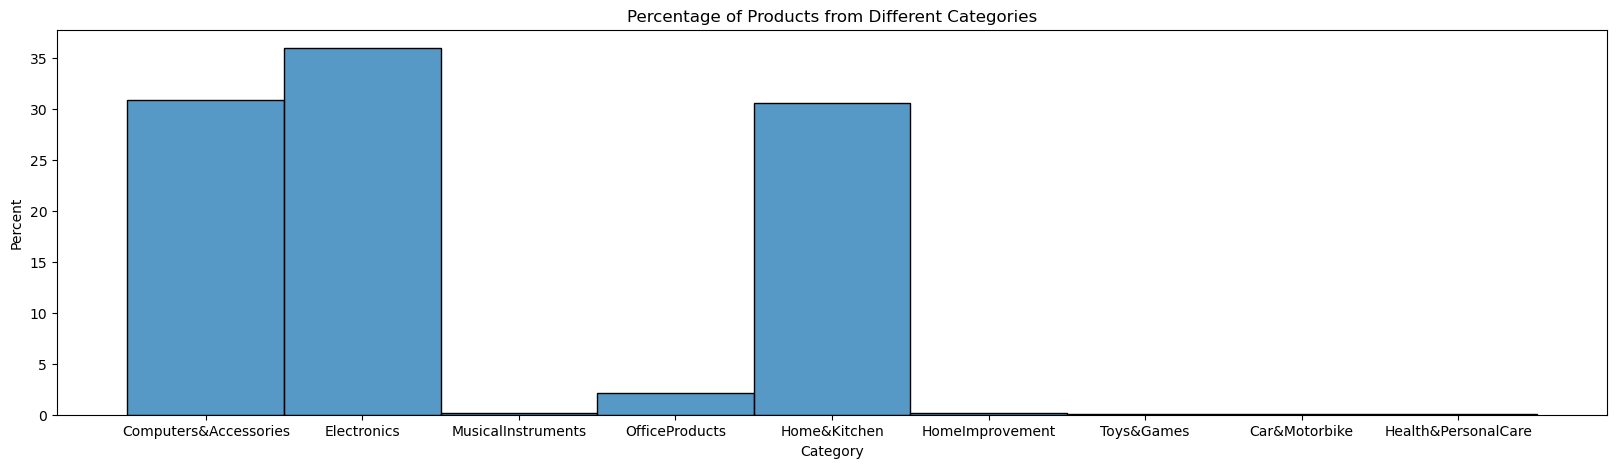

In [ ]:
#This histogram shows the percent of products from each category.

plt.figure(figsize=(20,5))

sns.histplot(data=df, x='category', stat='percent')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')

#This shows that categories 'Electronics', 'Computer and Accessories' and 'Home and Kitchen' have the highest percetages of sale.

Text(0.5, 1.0, 'Relation between Category and Number of Ratings')

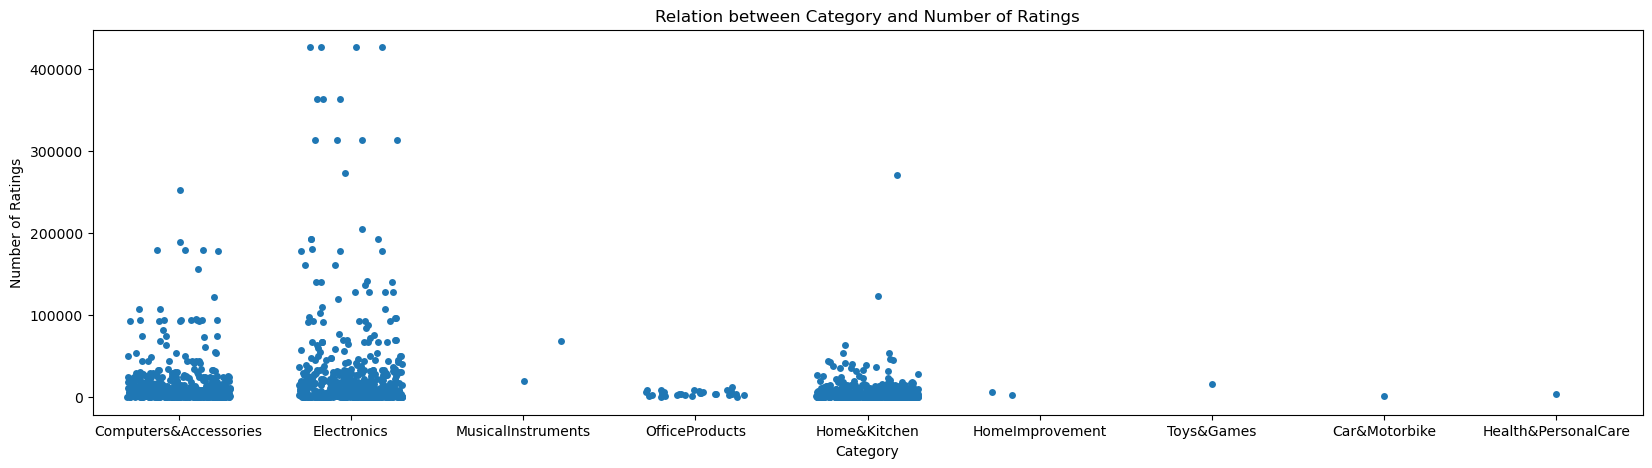

In [ ]:
#Products grouped by Category and counted based on Rating Count

plt.figure(figsize=(20,5))

sns.stripplot(data=df, x='category', y='rating_count', jitter=0.3)
plt.xlabel('Category')
plt.ylabel('Number of Ratings')
plt.title('Relation between Category and Number of Ratings')

#Electronics have the highest rating count and Car and Motorbike and Health and Personal Care have the minimum.

Text(0.5, 1.0, 'Relation between Discount Percentage and Number of Ratings')

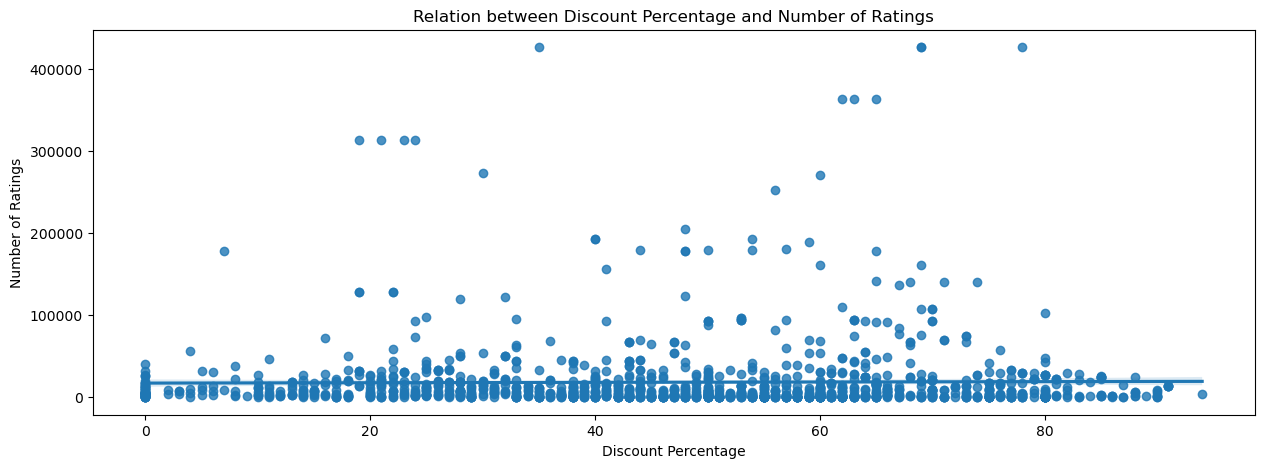

In [ ]:
#This plot tell us the demand (seen from rating_count) of different products on the basis of discount_price.

plt.figure(figsize=(15,5))

sns.regplot(data=df, x='discount_percentage', y='rating_count', )
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Ratings')
plt.title('Relation between Discount Percentage and Number of Ratings')

#This shows us that there was maximum sale of products when they were on a discount of about 40% and 70%-80%. Most people tend to buy products when they find very high discounts. 

## Refined Research question/interests for Milestone 3

1. **How discounts can affect the sales and number of ratings of different products?**

I saw from the last visualisation that the products which have high discounts are tend to be more attractive for customers than the ones which have low discounts on them.

2. **How there is variation in the discount percentage in the top 3 categories?**

For this question, I can plot the variations in the discount percentages for the top 3 categories. This question will be interesting to analyse as it includes visualisations from my other 2 research questions

3. **Which category of products has the highest sale?**

From the first and second visualisation, I saw that there are top 3 categories which have the highest sale.
